# Data Cleaning and Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [50]:
path = '/content/drive/MyDrive/Data/online_payments.csv'
payments = pd.read_csv(path)
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,474,CASH_OUT,126446.63,C174067172,380.00,0.00,C1304086107,3110081.55,3236528.17,0,0
1,371,CASH_OUT,153642.55,C337127075,30573.00,0.00,C1114937097,0.00,153642.55,0,0
2,164,CASH_OUT,137518.53,C1702587448,113492.00,0.00,C1757581032,0.00,137518.53,0,0
3,250,CASH_IN,207143.06,C368643872,21615216.43,21822359.49,C282319479,1420049.66,1212906.61,0,0
4,35,TRANSFER,805530.80,C682349864,0.00,0.00,C208507246,1407712.49,2213243.29,0,0


In [35]:
payments.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [51]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320000 entries, 0 to 319999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            320000 non-null  int64  
 1   type            320000 non-null  object 
 2   amount          320000 non-null  float64
 3   nameOrig        320000 non-null  object 
 4   oldbalanceOrg   320000 non-null  float64
 5   newbalanceOrig  320000 non-null  float64
 6   nameDest        320000 non-null  object 
 7   oldbalanceDest  320000 non-null  float64
 8   newbalanceDest  320000 non-null  float64
 9   isFraud         320000 non-null  int64  
 10  isFlaggedFraud  320000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 26.9+ MB


In [52]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,320000.000000,3.200000e+05,3.200000e+05,3.200000e+05,3.200000e+05,3.200000e+05,320000.000000,320000.000000
mean,243.454672,1.787817e+05,8.316842e+05,8.528243e+05,1.103943e+06,1.227495e+06,0.001250,0.000006
std,142.564403,5.893767e+05,2.888983e+06,2.924741e+06,3.485814e+06,3.745304e+06,0.035333,0.002500
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.338175e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.455500e+04,1.413435e+04,0.000000e+00,1.318600e+05,2.137321e+05,0.000000,0.000000
75%,335.000000,2.085494e+05,1.068637e+05,1.426395e+05,9.372722e+05,1.107397e+06,0.000000,0.000000
max,742.000000,5.894475e+07,3.473055e+07,3.472660e+07,3.555534e+08,3.553814e+08,1.000000,1.000000


Scaling won't be needed here because most of the columns are associated with amounts

In [53]:
# Checking the values in the step column
payments['step'].value_counts()

19     2533
18     2452
187    2419
235    2401
307    2396
       ... 
248       1
560       1
294       1
430       1
101       1
Name: step, Length: 550, dtype: int64

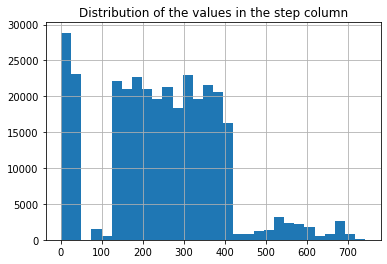

In [55]:
payments['step'].hist(bins=30)
plt.title('Distribution of the values in the step column');

In [57]:
payments['isFraud'].value_counts()

0    319600
1       400
Name: isFraud, dtype: int64

In [58]:
payments['isFlaggedFraud'].value_counts()

0    319998
1         2
Name: isFlaggedFraud, dtype: int64

It is clear here to see that the amount of flagged fraud transactions is significantly less than the number of actual fraud transactions

In [59]:
# Dropping columns 
payments.drop(columns=['step','nameDest', 'nameOrig'], inplace=True)

In [60]:
payments.rename(columns={'oldbalanceOrg':'old_balance_orig', 
                         'newbalanceOrig':'new_balance_orig', 
                         'oldbalanceDest':'old_balance_dest',
                         'newbalanceDest':'new_balance_dest',
                         'isFraud':'is_fraud',
                         'isFlaggedFraud':'is_flagged_fraud'}, inplace=True)

In [61]:
payments['type'].value_counts()

CASH_OUT    112797
PAYMENT     108387
CASH_IN      70055
TRANSFER     26614
DEBIT         2147
Name: type, dtype: int64

In [62]:
payments['type'].value_counts()

CASH_OUT    112797
PAYMENT     108387
CASH_IN      70055
TRANSFER     26614
DEBIT         2147
Name: type, dtype: int64

We can observe that cashout and payment take up more than 60% of all online transactions. While debit is the most insignificant

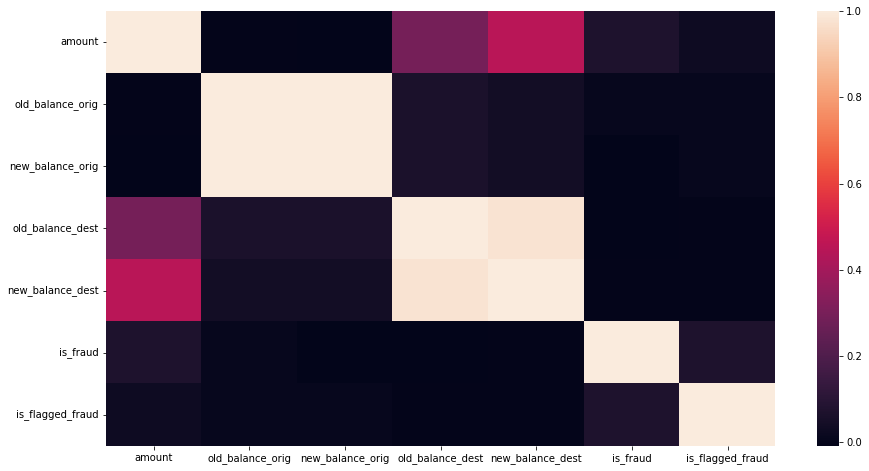

In [63]:
# Checking the correlation between the columns
plt.figure(figsize=(15,8))
sns.heatmap(payments.corr());

From this, we can see a few things:

1.The old_balance_orig and the new_balance_orig columns have a very high correlation.

2.The old_balance_dest and the new_balance_dest columns also have a very high correlation.

3.The amount column has some correlation, about 0.4 to 0.5, with the old_balance_dest and new_balane_dest columns.

**Analysing the is_fraud column:**

Creating a fraud variable to see the chhahracteristics of the fraudulent transactions in the dataset

In [64]:
payments["is_fraud"] = payments["is_fraud"].map({0: "No Fraud", 1: "Fraud"})

payments['is_flagged_fraud'] = payments['is_flagged_fraud'].map({0: "No", 1: "Yes"})

In [65]:
payments.head()

,type,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,CASH_OUT,126446.63,380.00,0.00,3110081.55,3236528.17,No Fraud,No
1,CASH_OUT,153642.55,30573.00,0.00,0.00,153642.55,No Fraud,No
2,CASH_OUT,137518.53,113492.00,0.00,0.00,137518.53,No Fraud,No
3,CASH_IN,207143.06,21615216.43,21822359.49,1420049.66,1212906.61,No Fraud,No
4,TRANSFER,805530.80,0.00,0.00,1407712.49,2213243.29,No Fraud,No


In [66]:
fraud = payments[payments['is_fraud'] == 'Fraud']
fraud

,type,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
2054,TRANSFER,215013.30,215013.30,0.00,0.00,0.00,Fraud,No
2176,TRANSFER,10000000.00,19593838.63,9593838.63,0.00,0.00,Fraud,No
2463,CASH_OUT,104171.37,104171.37,0.00,64407.18,168578.56,Fraud,No
2764,TRANSFER,1150561.97,1150561.97,0.00,0.00,0.00,Fraud,No
5575,CASH_OUT,1732090.28,1732090.28,0.00,998647.97,2730738.25,Fraud,No
...,...,...,...,...,...,...,...,...
317207,CASH_OUT,72782.82,72782.82,0.00,2185531.03,2258313.86,Fraud,No
318472,TRANSFER,265680.73,265680.73,0.00,0.00,0.00,Fraud,No
318620,TRANSFER,86070.17,86070.17,0.00,0.00,0.00,Fraud,No
318631,TRANSFER,794421.26,794421.26,0.00,0.00,0.00,Fraud,No


In [67]:
fraud['type'].value_counts()

TRANSFER    208
CASH_OUT    192
Name: type, dtype: int64

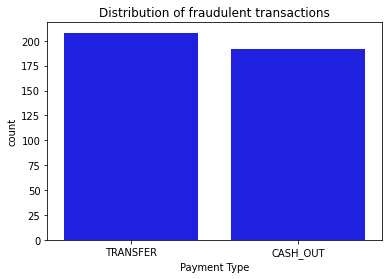

In [68]:
sns.countplot(data=fraud, x='type', color='blue')
plt.xlabel('Payment Type')
plt.title('Distribution of fraudulent transactions');

It is clear to see that only the transfer and the cashout transactions have samples that were fraudulent, with cashout hahving a slightly higher number of fraudulent transactions.

# Model Building

Mapping the type column so it can be used in training of the model

In [69]:
payments["type"] = payments["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [70]:
payments.head()

,type,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,126446.63,380.00,0.00,3110081.55,3236528.17,No Fraud,No
1,1,153642.55,30573.00,0.00,0.00,153642.55,No Fraud,No
2,1,137518.53,113492.00,0.00,0.00,137518.53,No Fraud,No
3,3,207143.06,21615216.43,21822359.49,1420049.66,1212906.61,No Fraud,No
4,4,805530.80,0.00,0.00,1407712.49,2213243.29,No Fraud,No


In [95]:
x = np.array(payments[['type','amount', 'old_balance_orig', 'new_balance_orig']])
y = np.array(payments['is_fraud'])

In [96]:
y.shape

(320000,)

Randomly splitting the variables into training and testing data using scikit learn's train test split.

In [72]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape

(256000, 4)

In [98]:
y_train.shape

(256000,)

## Decision Tree Classifier

Using the decision tree classifier to perdict fraudulent transactions just providing the type of transaction, the amount and your old and new account balances.

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt_model = DecisionTreeClassifier()

In [99]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

### Testing Accuracy

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
dt_pred = dt_model.predict(x_test)

In [101]:
print(confusion_matrix(y_test, dt_pred))

[[   61    31]
 [   15 63893]]


In [102]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       Fraud       0.80      0.66      0.73        92
    No Fraud       1.00      1.00      1.00     63908

    accuracy                           1.00     64000
   macro avg       0.90      0.83      0.86     64000
weighted avg       1.00      1.00      1.00     64000



In [104]:
features = np.array([[1, 72782.82, 72782.82, 0]])
print(dt_model.predict(features))

['Fraud']


## Logistic Regression Model

Using logistic regression to predict the same and checking which model's precision is higher.

In [105]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [106]:
lr_model.fit(x_train, y_train)

LogisticRegression()

### Testing Accuracy

In [107]:
lr_pred = lr_model.predict(x_test)

In [108]:
print(confusion_matrix(y_test, lr_pred))

[[   85     7]
 [   20 63888]]


In [109]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       Fraud       0.81      0.92      0.86        92
    No Fraud       1.00      1.00      1.00     63908

    accuracy                           1.00     64000
   macro avg       0.90      0.96      0.93     64000
weighted avg       1.00      1.00      1.00     64000



In [111]:
features = np.array([[4, 181.0, 181.0, 0]])
print(lr_model.predict(features))

['Fraud']


Since the Decision Tree Clasifier has a precision of 80% and the logistic regression has one of 81%, I would build my model on the logistic regression.

# Saving the Model

importing the pickle package to save the trained model. This model would be used in deploying the web application.

In [112]:
import pickle

In [113]:
filename = 'trained_lr_model.csv'
pickle.dump(lr_model, open(filename, 'wb'))

## Loading the saved model

In [114]:
loaded_model = pickle.load(open('trained_lr_model.csv', 'rb'))